
# The Adult Income dataset

## Description

### Title of dataset: adult.csv

#### Sources:

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96

#### Number of Instances:

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

#### Number of Attributes/Fearures/Columns:

* 6 continuous, 8 nominal attributes.
#### Attribute Information/Fearures/Columns

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, * Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K

#### Missing Values:

7% rows have missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
miss = ['?']
df=pd.read_csv('adult.csv',na_values = miss)

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df['income'].astype('category').value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
df[df.isnull().sum(axis=1) >=3]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,NaN,243190,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,30,NaN,<=50K
2323,50,NaN,339547,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,50,NaN,<=50K
2584,47,NaN,163748,Masters,14,Divorced,NaN,Unmarried,White,Female,0,0,35,NaN,<=50K
2612,27,NaN,258231,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,35,NaN,<=50K
2774,27,NaN,132372,HS-grad,9,Never-married,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K
3074,23,NaN,264874,Assoc-voc,11,Never-married,NaN,Other-relative,White,Female,0,0,40,NaN,<=50K
3671,24,NaN,35633,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,11,NaN,<=50K
3853,28,NaN,195568,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,15,NaN,>50K
5052,21,NaN,156780,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,15,NaN,<=50K
5972,40,NaN,95049,Assoc-voc,11,Separated,NaN,Own-child,White,Female,0,0,40,NaN,<=50K


In [7]:
df=df.dropna(how='any')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


## Data Preperation

In [9]:
df.drop('fnlwgt',axis=1,inplace=True)

In [10]:
df.shape

(45222, 14)

In [11]:
df.drop('educational-num',axis=1,inplace=True)

In [12]:
df.shape

(45222, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   marital-status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   gender          45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
 11  native-country  45222 non-null  object
 12  income          45222 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


In [14]:
cat = df.select_dtypes(include=['object'])
cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [15]:
num = df.select_dtypes(include=['int64' , 'float64'])
num.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_num = pd.DataFrame(ss.fit_transform(num),
                      columns = num.columns)
df_num.head()

,age,capital-gain,capital-loss,hours-per-week
0,-1.024983,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.146733,-0.21878,0.754701
2,-0.798015,-0.146733,-0.21878,-0.078120
3,0.412481,0.877467,-0.21878,-0.078120
4,-0.344079,-0.146733,-0.21878,-0.910942


In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first', sparse=False)
categorical_array = encoder.fit_transform(cat)

In [18]:
features =   list(encoder.get_feature_names(cat.columns))
features.remove('workclass_Federal-gov')
features.remove('education_10th')
features.remove('marital-status_Divorced')
features.remove( 'occupation_Adm-clerical')
features.remove('relationship_Husband')
features.remove('race_Amer-Indian-Eskimo')
features.remove('gender_Female')
features.remove('native-country_Cambodia')
features.remove('income_<=50K')


In [19]:
df_cat = pd.DataFrame(categorical_array, columns=features)
df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
features

['workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-ser

In [21]:
df= pd.concat([df_num, df_cat],axis=1)
df.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
y=df.pop('income_>50K')
x=df

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3, random_state=30)

In [129]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13566, 94) (13566,)
(31656, 94) (31656,)


In [130]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[ 0.33013306  2.62150085  0.2734741   0.38001062 -0.66514714 -0.59867201
  -0.56894668 -1.14807387 -0.88423791 -0.17376929 -0.40085037 -0.03144483
  -1.1708462  -0.41318309 -0.95635605 -0.72382348  0.78327034  0.73881461
   1.41456326  2.74451334  0.36505727  1.76358463 -0.52419966  2.26020488
   0.67546179  0.957833    1.63230795  0.20510889 -0.61353398 -0.34368622
  -0.05053238 -0.06087006  0.05021181  0.84318853 -1.06434738 -0.6802894
  -0.1999788  -0.63180795 -1.05326798  0.53929693  0.45162588  0.2622725
   0.58579235 -0.14977876 -0.03508194 -0.45534328 -0.91708623 -0.11284192
   1.08029207  0.11253237 -0.24170345  0.4868477   0.08758899  0.61138784
   0.16015278 -0.37937504 -1.1462199   0.38395869 -0.22286262  0.13616678
  -0.40981172  0.44050082  0.47015581  0.66725494 -0.23718977  0.24906225
  -0.61579276  0.         -0.19580549 -0.81223877  0.05032511  0.04517335
  -0.19339791  0.75665281  1.34946226  0.02190112  0.07381481 -0.2539896
  -0.58538607 -0.24364837  0.13868941 -0.

In [132]:
y_train_pred = logisticRegr.predict(x_train)

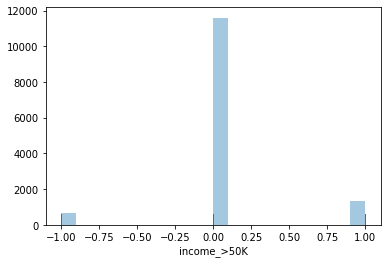

In [133]:
residual = y_train - y_train_pred

sns.distplot(residual, bins=20, kde=False, rug=True)

In [134]:
y_test_pred = logisticRegr.predict(x_test)

In [135]:
temp_df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
38210,0.0,0.0
34457,0.0,0.0
274,1.0,1.0
17637,0.0,0.0
30247,0.0,0.0


In [136]:
from sklearn import metrics

print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error : 0.15557872125347486
Mean Squared Error: 0.15557872125347486
Root Mean Squared Error: 0.39443468566224604


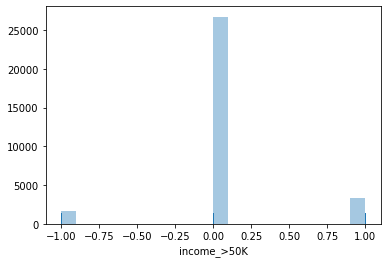

In [137]:
residual_test = y_test - y_test_pred

sns.distplot(residual_test, bins=20, kde=False, rug=True)

In [138]:
print(metrics.r2_score(y_test,y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.1679289366231207
0.8444212787465252


In [139]:
c_matrix=metrics.confusion_matrix(y_test,y_test_pred)
c_matrix

array([[22137,  1638],
       [ 3287,  4594]], dtype=int64)

In [140]:
print(metrics.classification_report(y_test, y_test_pred))
#Number of features = 95

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     23775
         1.0       0.74      0.58      0.65      7881

    accuracy                           0.84     31656
   macro avg       0.80      0.76      0.78     31656
weighted avg       0.84      0.84      0.84     31656



## RFE

In [141]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()


In [142]:
rfe = RFE(lgr , 44)
rfe = rfe.fit(x_train, y_train)

In [143]:
temp_df = pd.DataFrame({"Columns" : x_train.columns, "Include" : rfe.support_, "ranking" : rfe.ranking_})
temp_df

,Columns,Include,ranking
0,age,False,14
1,capital-gain,True,1
2,capital-loss,False,24
3,hours-per-week,False,7
4,workclass_Local-gov,True,1
...,...,...,...
89,native-country_Thailand,True,1
90,native-country_Trinadad&Tobago,False,40
91,native-country_United-States,False,32
92,native-country_Vietnam,True,1


In [144]:
imp_col = x_train.columns[rfe.support_]
imp_col

Index(['capital-gain', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_11th',
       'education_1st-4th', 'education_7th-8th', 'education_9th',
       'education_Bachelors', 'education_Doctorate', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Tech-support', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'gender_Male',
       'native-country_China', 'native-country_Columbia',
       'native-country_El-Salvador', 'native-country_Haiti',
       'native-country_Hong', 'native-country_Ireland', 'n

In [145]:
x_train_new = df[imp_col]
x_train_new.head()

,capital-gain,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,education_11th,education_1st-4th,education_7th-8th,education_9th,education_Bachelors,...,native-country_Ireland,native-country_Italy,native-country_Mexico,native-country_Peru,native-country_Poland,native-country_Scotland,native-country_South,native-country_Thailand,native-country_Vietnam,native-country_Yugoslavia
0,-0.146733,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.146733,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.146733,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.877467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.146733,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
from sklearn.linear_model import LogisticRegression
regressor_new = LogisticRegression()
regressor_new.fit(x_train_new,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

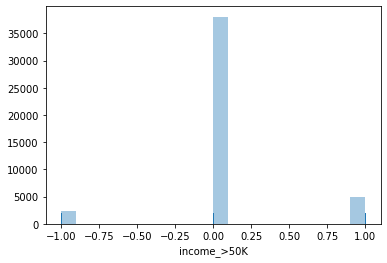

In [147]:
y_train_pred_new = regressor_new.predict(x_train_new)
residual = y - y_train_pred_new
sns.distplot(residual, bins=20, kde=False, rug=True)

In [148]:
x_test_new = df[imp_col]
y_test_pred_new = regressor_new.predict(x_test_new)

In [149]:
temp_df_new =pd.DataFrame({'Actual' : y, 'Predicted' : y_test_pred_new})
temp_df_new

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
45217,0.0,0.0
45218,1.0,0.0
45219,0.0,0.0
45220,0.0,0.0


In [150]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y,y_test_pred_new))

print('Mean Squared Error: ', metrics.mean_squared_error(y,y_test_pred_new))

print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y,y_test_pred_new)))

Mean Absolute Error:  0.1586617133253726
Mean Squared Error:  0.1586617133253726
Root Mean Squared Error : 0.3983236288815573


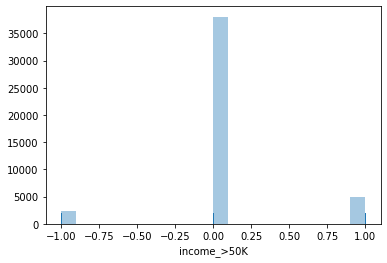

In [151]:
residual_test_new = y - y_test_pred_new

sns.distplot(residual_test_new, bins=20, kde=False, rug=True)

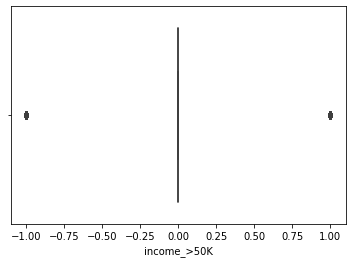

In [152]:
sns.boxplot(residual_test_new)

In [153]:
res_df = pd.DataFrame({'res_test' : residual_test, 'res_test_new': residual_test_new})
res_df.head()

,res_test,res_test_new
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,NaN,0.0
4,0.0,0.0


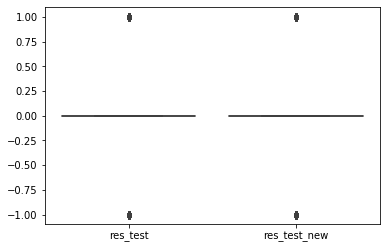

In [154]:
sns.boxplot(data = res_df)

In [155]:
print(metrics.classification_report(y, y_test_pred_new))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     34014
         1.0       0.73      0.57      0.64     11208

    accuracy                           0.84     45222
   macro avg       0.80      0.75      0.77     45222
weighted avg       0.83      0.84      0.83     45222



## PCA

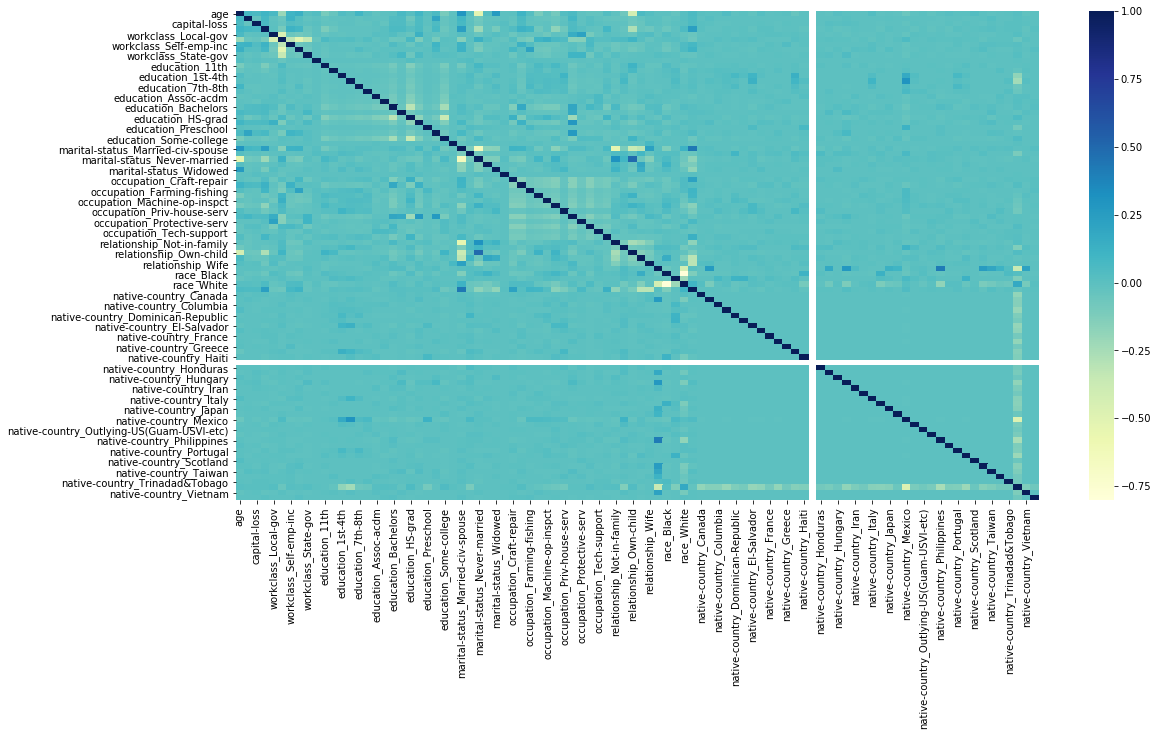

In [156]:
plt.figure(figsize=(18, 9))
sns.heatmap(x_train.corr(), cmap="YlGnBu")

In [157]:
x_train.shape

(13566, 94)

In [158]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)


In [159]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

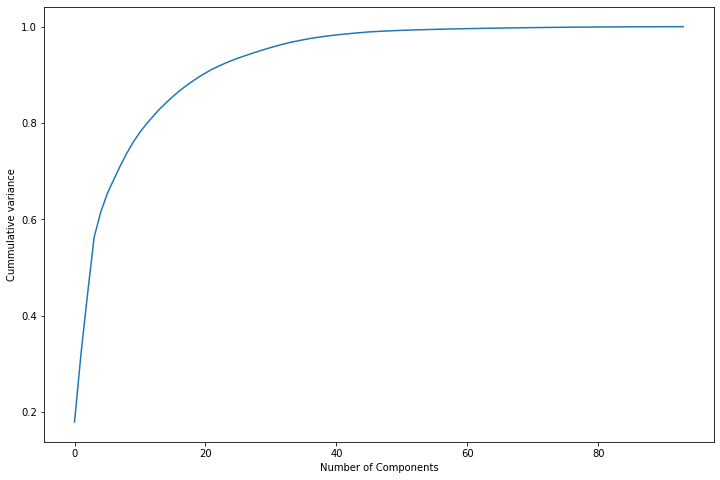

In [161]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [162]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17942246, 0.32233025, 0.44598396, 0.56298846, 0.61490065,
       0.65331841, 0.68270483, 0.71147396, 0.73761357, 0.76088283,
       0.78101297, 0.79832745, 0.81389199, 0.82896787, 0.8421569 ,
       0.85482754, 0.86639026, 0.87694259, 0.88640443, 0.89566751,
       0.90379463, 0.911506  , 0.91789795, 0.92405414, 0.92966309,
       0.93477321, 0.93953866, 0.94406053, 0.94848643, 0.95271929,
       0.95682796, 0.9605392 , 0.96423712, 0.96759574, 0.97033107,
       0.97293767, 0.97550904, 0.9776209 , 0.9794844 , 0.98125876,
       0.98286229, 0.98427811, 0.98561452, 0.98689616, 0.98803586,
       0.9891553 , 0.98992334, 0.99061982, 0.9912629 , 0.9918685 ,
       0.99239101, 0.99286595, 0.99329183, 0.99370414, 0.99407991,
       0.99443615, 0.99476438, 0.99508078, 0.99536348, 0.99564241,
       0.99590633, 0.99616723, 0.99642027, 0.99666661, 0.99689009,
       0.99710514, 0.9973088 , 0.99750729, 0.99770039, 0.99788416,
       0.99806608, 0.99824506, 0.99840839, 0.99856275, 0.99870

In [163]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 44, random_state=0)

x_train_pca = pca_final.fit_transform(x_train)

In [164]:
x_train_pca.shape

(13566, 44)

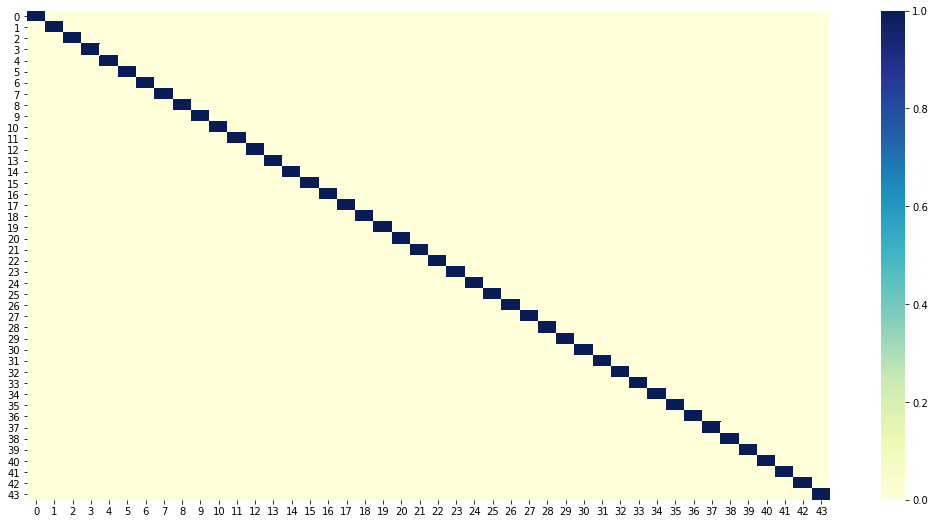

In [165]:
corrmat = np.corrcoef(x_train_pca.T)

plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [166]:
x_test_pca = pca_final.transform(x_test)

In [168]:
from sklearn.linear_model import LogisticRegression

regressor_pca = LogisticRegression()

regressor_pca.fit(x_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
print(regressor_pca.coef_)
print(regressor_pca.intercept_)

[[ 2.41080172  1.49570546  1.23316603  0.43556612 -1.1305026  -0.85109343
  -0.2652787  -0.25414581 -1.15760619 -0.16228682 -0.92555733  0.36754278
   0.14441305 -0.39391983 -1.14176477 -0.68154512  0.28036996  0.05263134
  -0.91115142 -0.74347604 -0.57139694 -0.34858229  0.23447358 -0.61069999
   0.59411108  0.77798748  0.5115203   0.58932811 -0.3514679  -0.24281861
  -0.54583766  0.44587406 -0.78344041  0.89571757 -0.85241617  0.51054452
   0.01482293 -0.37950525 -1.0807599  -1.52040656  0.38495366  0.68124913
  -1.31387287  1.63768709]]
[-1.8642773]


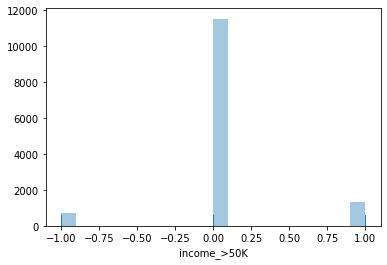

In [172]:
y_train_pred_pca = regressor_pca.predict(x_train_pca)

residual_pca = y_train - y_train_pred_pca

sns.distplot(residual_pca, bins=20, kde=False, rug=True)

In [174]:
y_test_pred_pca = regressor_pca.predict(x_test_pca)

temp_df = pd.DataFrame({'Actual':y_test, 'Predict':y_test_pred_pca})

temp_df.head()

,Actual,Predict
38210,0.0,0.0
34457,0.0,0.0
274,1.0,1.0
17637,0.0,0.0
30247,0.0,0.0


In [176]:
from sklearn import metrics

print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_test_pred_pca))

print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_test_pred_pca))

print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_pca)))

Mean Absolute Error:  0.15602097548647967
Mean Squared Error:  0.15602097548647967
Root Mean Squared Error:  0.394994905646237


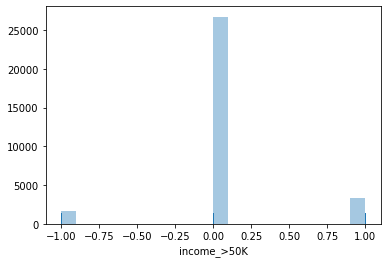

In [178]:
residual_test_pca = y_test-y_test_pred_pca

sns.distplot(residual_test_pca, bins=20, kde=False, rug=True)

In [179]:
print(metrics.r2_score(y_test,y_test_pred_pca))
print(metrics.accuracy_score(y_test,y_test_pred_pca))

0.16556365847341992
0.8439790245135204


In [180]:
print(metrics.classification_report(y_test,y_test_pred_pca))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     23775
         1.0       0.73      0.58      0.65      7881

    accuracy                           0.84     31656
   macro avg       0.80      0.76      0.78     31656
weighted avg       0.84      0.84      0.84     31656



## KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [185]:
y_test_pred_knn = classifier.predict(x_test)

In [186]:
metrics.accuracy_score(y_test,y_test_pred_knn)

0.8274576699519838

In [188]:
metrics.confusion_matrix(y_test,y_test_pred_knn)

array([[21548,  2227],
       [ 3235,  4646]], dtype=int64)

In [189]:
print(metrics.classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     23775
         1.0       0.68      0.59      0.63      7881

    accuracy                           0.83     31656
   macro avg       0.77      0.75      0.76     31656
weighted avg       0.82      0.83      0.82     31656



## Decision Tree

In [202]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 100)
clf = clf.fit(x_train_pca , y_train)
y_test_predict_dt = clf.predict(x_test_pca)

In [203]:
metrics.accuracy_score(y_test , y_test_predict_dt)

0.7973843821076573

In [205]:
metrics.confusion_matrix(y_test,y_test_predict_dt)

array([[20726,  3049],
       [ 3365,  4516]], dtype=int64)

In [206]:
print(metrics.classification_report(y_test ,y_test_predict_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     23775
         1.0       0.60      0.57      0.58      7881

    accuracy                           0.80     31656
   macro avg       0.73      0.72      0.73     31656
weighted avg       0.79      0.80      0.80     31656



## SVM

In [207]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(x_train_pca, y_train)
y_test_predict_svm = classifier_svc.predict(x_test_pca)

In [208]:
metrics.accuracy_score(y_test,y_test_predict_svm)

0.8479593126105636

In [209]:
metrics.confusion_matrix(y_test,y_test_predict_svm)

array([[22276,  1499],
       [ 3314,  4567]], dtype=int64)

In [210]:
print(metrics.classification_report(y_test, y_test_predict_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     23775
         1.0       0.60      0.57      0.58      7881

    accuracy                           0.80     31656
   macro avg       0.73      0.72      0.73     31656
weighted avg       0.79      0.80      0.80     31656

